In [1]:
set.seed(624) #ONLY WRITE THIS ONCE

library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Parsed with column specification:
cols(
  .default = col_character(),
  X4 = col_logical(),
  X6 = col_logical(),
  X8 = col_logical(),
  X10 = col_logical(),
  X12 = col_logical(),
  X14 = col_logical(),
  X16 = col_logical(),
  X18 = col_logical(),
  X20 = col_logical(),
  X22 = col_logical(),
  X24 = col_logical(),
  X26 = col_logical(),
  X28 = col_logical(),
  X30 = col_logical(),
  X32 = col_logical(),
  X34 = col_logical(),
  X36 = col_logical(),
  X38 = col_logical(),
  X40 = col_logical(),
  X42 = col_logical()
  # ... with 9 more columns
)

See spec(...) for full column specifications.



HDI_Rank,Average_Years_of_Schooling
<dbl>,<dbl>
169,2.6
169,2.9
169,3.2
169,3.6
⋮,⋮
150,10.4
150,10.5
150,10.5
150,11.0


`summarise()` ungrouping output (override with `.groups` argument)



HDI_ranges,Number_of_rows
<fct>,<int>
Very_High,1947
High,1519
Medium,1062
Low,956


<Analysis/Assess/Total>
<4114/1370/5484>

HDI_Rank,Average_Years_of_Schooling
<dbl>,<dbl>
169,2.6
169,2.9
169,3.2
169,3.6
⋮,⋮
150,10.3
150,10.4
150,10.5
150,10.5


    HDI_Rank      Average_Years_of_Schooling
 Min.   :  1.00   Min.   : 2.10             
 1st Qu.: 47.00   1st Qu.: 9.90             
 Median : 94.00   Median :12.10             
 Mean   : 94.04   Mean   :11.82             
 3rd Qu.:142.00   3rd Qu.:14.10             
 Max.   :189.00   Max.   :23.10             

Number_of_Rows
<int>
4114


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 17 rows containing missing values (geom_smooth).”


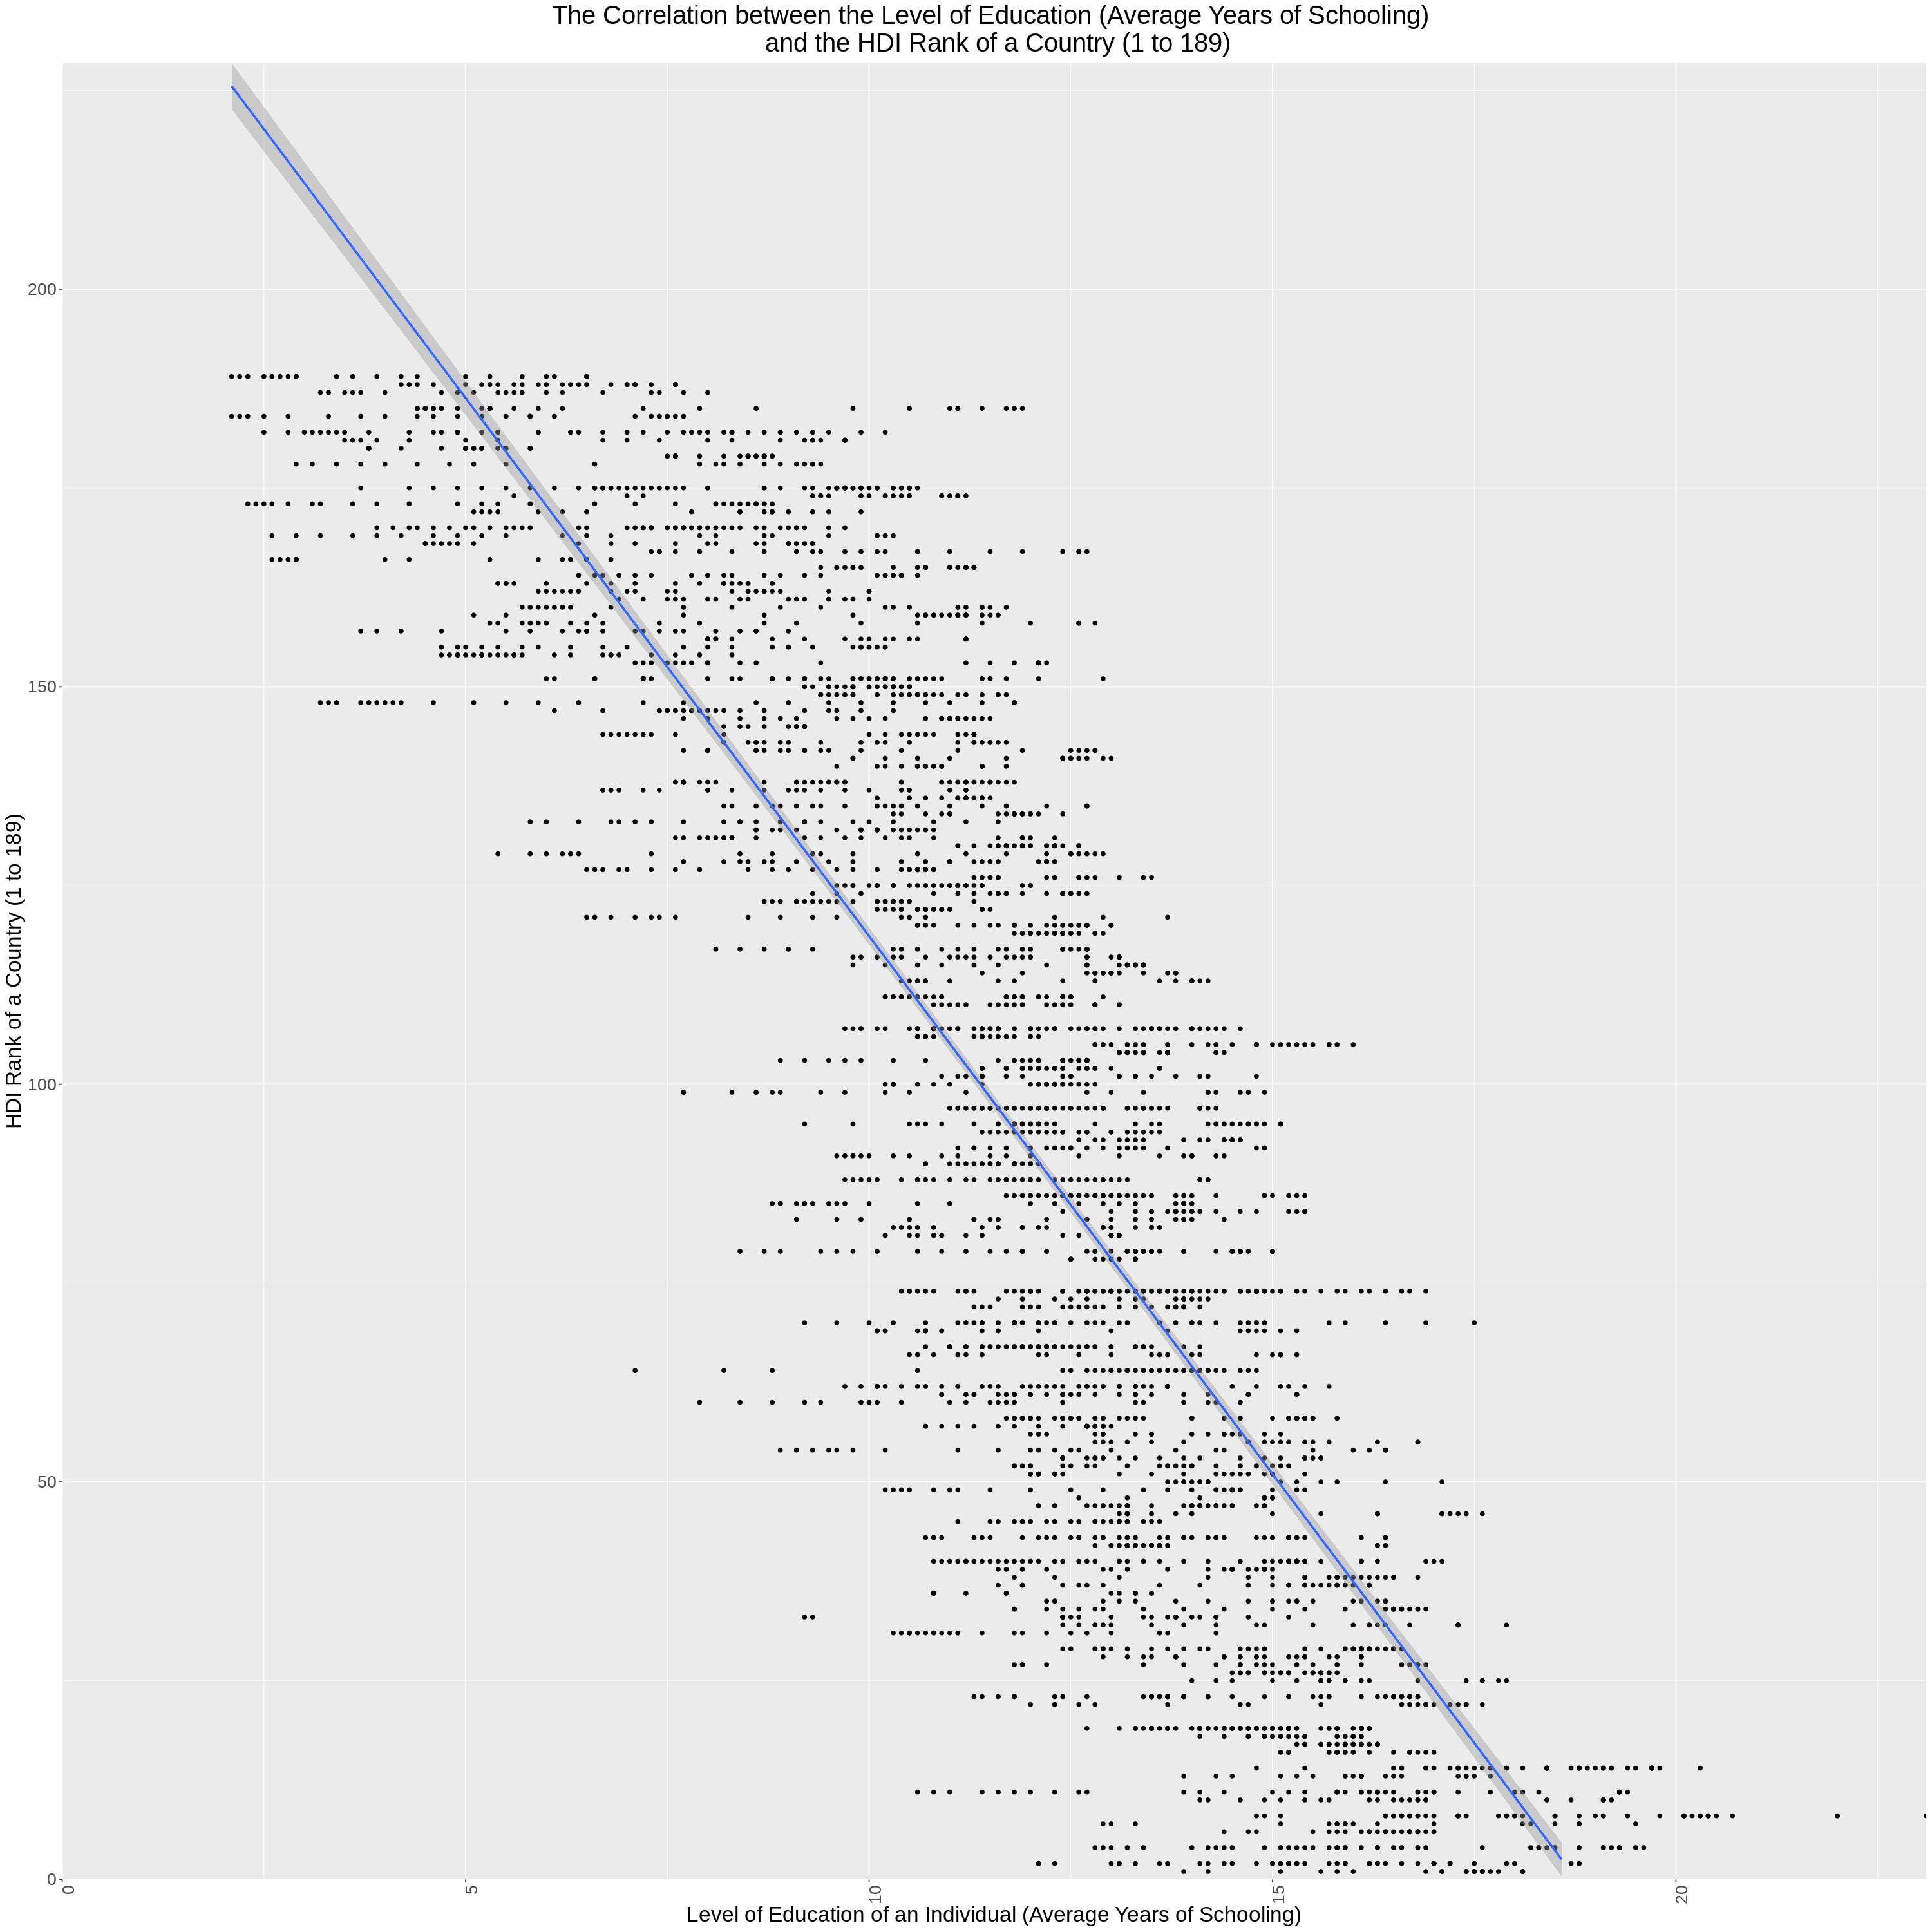

In [43]:
options(repr.matrix.max.rows= 8)

Expected_Years_of_Schooling_vs_HDI<- read_tsv("https://raw.githubusercontent.com/MarranaTT/Group_46_Final_Project/main/Expected_years%20of%20schooling_(years).tsv",
    col_names = FALSE, skip =6)%>%
    slice(1:(n()-9))%>%
        select(X1:X62)%>%
        filter(X1 != "NA")

EYS_vs_HDI <- Expected_Years_of_Schooling_vs_HDI[, colSums(is.na(Expected_Years_of_Schooling_vs_HDI)) < nrow(Expected_Years_of_Schooling_vs_HDI)]

Invalid_Col <- c("X62")

EYS_vs_HDI_NA_Drop = EYS_vs_HDI[,!(names(EYS_vs_HDI) %in% Invalid_Col)]

EYS_vs_HDI_Col_ShiftUp<- EYS_vs_HDI_NA_Drop[-c(1),]  

EYS_vs_HDI_Colnames_Created <- c("HDI_Rank","Name_of_Country","1990","1991", "1992", "1993", "1994","1995", "1996", "1997", "1998","1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007",  "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015","2016", "2017", "2018", "2019")
colnames(EYS_vs_HDI_Col_ShiftUp) <- EYS_vs_HDI_Colnames_Created

EYS_vs_HDI_Tidy <- pivot_longer(EYS_vs_HDI_Col_ShiftUp, cols = "1990":"2019",
                 names_to = "Years",
                values_to = "Average_Years_of_Schooling")%>%
        select("HDI_Rank", "Name_of_Country", "Years", "Average_Years_of_Schooling")%>%
        filter(HDI_Rank != "..", Average_Years_of_Schooling != ".." )%>%
        mutate(HDI_Rank = as.numeric(HDI_Rank))%>%
        mutate(Average_Years_of_Schooling = as.numeric(Average_Years_of_Schooling))%>%
                select(-Name_of_Country,-Years)
EYS_vs_HDI_Tidy

EYS_vs_HDI_Tidy_Range_Classification <- EYS_vs_HDI_Tidy %>%
                    mutate(ranges = cut(HDI_Rank,breaks = c(1, 66, 119, 156, 189),labels = c("Very_High","High","Medium", "Low"), include.lowest = TRUE)) %>%
                    group_by(ranges) %>%
                    summarise(Number_of_rows= n())%>%
                    rename(HDI_ranges = ranges)
EYS_vs_HDI_Tidy_Range_Classification



EYS_vs_HDI_Split <- initial_split(EYS_vs_HDI_Tidy, prop = 0.75, strata = HDI_Rank)
EYS_vs_HDI_Split

EYS_vs_HDI_Train <- training(EYS_vs_HDI_Split)
EYS_vs_HDI_Train

EYS_vs_HDI_Test <- testing(EYS_vs_HDI_Split)

EYS_vs_HDI_Tidy_Summary <- summary(EYS_vs_HDI_Train)
EYS_vs_HDI_Tidy_Summary


EYS_vs_HDI_Train_Count <- count(EYS_vs_HDI_Train)%>%
                        rename(Number_of_Rows = n)
EYS_vs_HDI_Train_Count

options(repr.plot.width=25, repr.plot.height=25)

EYS_vs_HDI_Train_Plot <- EYS_vs_HDI_Train %>%
                    ggplot(aes(x = Average_Years_of_Schooling, y = HDI_Rank))+
                    geom_point()+
                    geom_smooth(method = "lm")+
                    labs(x= "Level of Education of an Individual (Average Years of Schooling)" , y = "HDI Rank of a Country (1 to 189)")+
                    ggtitle("The Correlation between the Level of Education (Average Years of Schooling) \n and the HDI Rank of a Country (1 to 189)")+
                    theme(axis.text.x = element_text(angle = 90, , hjust = 1),
                        text = element_text(size= 20))+
                    theme(plot.title = element_text(hjust = 0.5)) +
                    scale_x_continuous(expand = c(0,0), limits = c(0, NA))+
                    scale_y_continuous(expand = c(0,0), limits = c(0, NA))
EYS_vs_HDI_Train_Plot
#This plots our graph for exploratory analysis